### 토픽 모델링
토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법입니다. 즉 문서의 집합에서 토픽을 찾아내는 프로세스
##### 검색 엔진 , 고객 민우너 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용!

텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법

# 1) 잠재 의미 분석(LSA)

토픽 모델링이라는 분야에 아이디어를 제공한 알고리즘 ( LDA 는 LSA 의 단점을 개선한 제품 )

Bow에 기반한 DTM 이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법 -> 단어의 의미를 고려 X

의미를 끌어내기 위해 --> 잠재 의미 분석

### 1. 특이값 분해

A=UΣV^T 

- U:m×m 직교행렬 (AAT=U(ΣΣT)UT)
- Σ:m×n 직사각 대각행렬
- V:n×n 직교행렬 (ATA=V(ΣTΣ)VT)


3개의 행렬의 곱으로 분해할 수 있다.

### 절단된 SVD 

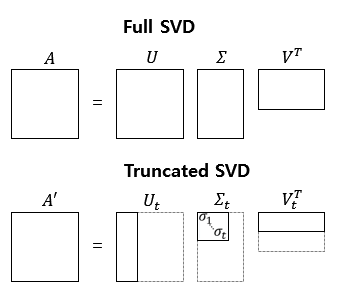

이러한 식으로 데이터의 차원을 줄이면 계산 비용이 낮아지는 효과를 볼 수 있다. 영상 처리 분야에서는 노이즈를 제거한다는 의미!

# 잠재 의미 분석

기존의 DTM , TF-IDF 행령 --> 단어의 의미를 전혀 고려하지 X

절단된 SVD 를 사용하여 차원을 축소시키고 단어들의 잠재적인 의미를 끌어내자!

실습을 통해 이해해보자



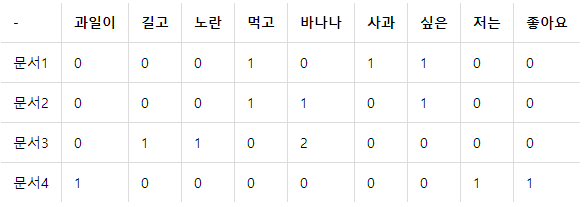

In [1]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

In [2]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [3]:
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


(4, 4)

In [5]:
print(s.round(2))
np.shape(s) # s를 대각행렬로 하려면 추가로 수정해줘야한다.


[2.69 2.05 1.73 0.77]


(4,)

In [6]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [7]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

지금까지 풀 SVD이다. 절단된 SVD 를 수행해보자

In [8]:
S=S[:2,:2]
print(S.round(2))

U=U[:,:2]
print(U.round(2))

VT=VT[:2,:]
print(VT.round(2))

[[2.69 0.  ]
 [0.   2.05]]
[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [9]:
# U x S x VT 하면 기존과 다른 값이 나온다. ( 기존을 복구할 수 없다. )
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


이 문서 벡터들과 단어 벡터들을 통해 다른 문서의 유사도, 다른 단어의 유사도, 단어(쿼리)로부터 문서의 유사도를 구하는 것들이 가능해진다.

## 뉴스 그룹 데이터에 대한 이해

In [10]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [11]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [12]:
# 어떤 카테고리인지

print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [14]:
# 불용어 제거
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [15]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [16]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

(11314, 1000)

In [18]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [19]:
np.shape(svd_model.components_)

(20, 1000)

In [20]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)


Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

## LSA의 장점, 단점

정리해보면 LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 이끌어낼 수 있어 문서의 유사도 계산 등에서 좋은 성능을 보여준다는 장점을 갖고 있습니다.

 하지만 SVD의 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하려고하면 보통 처음부터 다시 계산해야 합니다. 즉, 새로운 정보에 대해 업데이트가 어렵습니다
 
 -> Word2Vec 등 단어의 의미를 벡터화 할 수 있는 인공 신경망 기반의 방법론이 각광받는 이유이다!

# 잠재 디리클레 할당 (LDA)
LDA는 토픽 모델링의 대표적인 알고리즘입니다. 

문서가 3개 있다고 가정하자

- 문서1 : 저는 사과랑 바나나를 먹어요
- 문서2 : 우리는 귀여운 강아지가 좋아요
- 문서3 : 저의 깜찍하고 귀여운 강아지가 바나나를 먹어요

2개의 토픽을 찾는 걸로 사용자가 정해보자!

LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정한다.

### <각 문서의 토픽 분포>
- 문서1 : 토픽 A 100%
- 문서2 : 토픽 B 100%
- 문서3 : 토픽 B 60%, 토픽 A 40%

### <각 토픽의 단어 분포>
- 토픽A : 사과 20%, 바나나 40%, 먹어요 40%, 귀여운 0%, 강아지 0%, 깜찍하고 0%, 좋아요 0%
- 토픽B : 사과 0%, 바나나 0%, 먹어요 0%, 귀여운 33%, 강아지 33%, 깜찍하고 16%, 좋아요 16%

--> 과일에 대한 토픽과 강아지에 대한 토픽이라고 판단할 수 있다. (토픽의 제목은 따로 정해주지 않음)

# LDA의 가정

LDA는 문서들로부터 토픽을 뽑아내기 위해서 가정을 한다. 
#####  '나는 이 문서를 작성하기 위해서 이런 주제들을 넣을거고, 이런 주제들을 위해서는 이런 단어들을 넣을 거야.'

#### 1) 문서에 사용할 단어의 개수 N을 정합니다.
#### - Ex) 5개의 단어를 정하였습니다.
#### 2) 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정합니다.
#### - Ex) 위 예제와 같이 토픽이 2개라고 하였을 때 강아지 토픽을 60%, 과일 토픽을 40%와 같이 선택할 수 있습니다.
#### 3) 문서에 사용할 각 단어를 (아래와 같이) 정합니다.
#### 3-1) 토픽 분포에서 토픽 T를 확률적으로 고릅니다.
#### - Ex) 60% 확률로 강아지 토픽을 선택하고, 40% 확률로 과일 토픽을 선택할 수 있습니다.
#### 3-2) 선택한 토픽 T에서 단어의 출현 확률 분포에 기반해 문서에 사용할 단어를 고릅니다.
#### - Ex) 강아지 토픽을 선택하였다면, 33% 확률로 강아지란 단어를 선택할 수 있습니다. 이제 3)을 반복하면서 문서를 완성합니다


# LDA의 수행 순서를 알아보자!

1) 사용자는 알고리즘에게 토픽의 개수를 알려준다

2) 모든 단어를 k개 중 하나의 토픽에 할당한다.

3) 이제 모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행한다.

3-1) 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 w는 아래의 두 가지 기준에 따라서 토픽이 재할당됩니다.

- p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
- p(word w | topic t) : 단어 w를 갖고 있는 모든 문서들 중 토픽 t가 할당된 비율

# 실습을 통한 이해



In [4]:
from nltk.corpus import stopwords
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [5]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
# (word_id , word_frequency)의 형태로 바꾸자
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [9]:
# 토픽의 개수를 20으로 하여 LDA 모델을 학습시키자

import gensim
NUM_TOPICS = 20 #20개의 토픽, k=20
# 각 토픽에서 단어들의 기여도를 출력해보자! ( 4 개의 단어로 )
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.007*"like" + 0.006*"good" + 0.006*"used" + 0.006*"time"')
(1, '0.072*"space" + 0.026*"nasa" + 0.015*"launch" + 0.013*"satellite"')
(2, '0.015*"windows" + 0.010*"window" + 0.009*"using" + 0.009*"program"')
(3, '0.020*"would" + 0.013*"people" + 0.011*"think" + 0.010*"like"')
(4, '0.017*"drive" + 0.013*"card" + 0.012*"thanks" + 0.012*"please"')
(5, '0.028*"period" + 0.016*"play" + 0.015*"power" + 0.010*"scorer"')
(6, '0.017*"game" + 0.016*"team" + 0.014*"year" + 0.011*"games"')
(7, '0.009*"mask" + 0.009*"plane" + 0.008*"event" + 0.008*"rockefeller"')
(8, '0.020*"file" + 0.013*"information" + 0.012*"available" + 0.011*"entry"')
(9, '0.019*"encryption" + 0.017*"chip" + 0.014*"security" + 0.014*"keys"')
(10, '0.018*"nist" + 0.012*"doug" + 0.011*"insurance" + 0.009*"traded"')
(11, '0.009*"part" + 0.006*"theory" + 0.006*"books" + 0.006*"john"')
(12, '0.020*"jesus" + 0.013*"christian" + 0.012*"bible" + 0.010*"church"')
(13, '0.030*"armenian" + 0.028*"jews" + 0.027*"turkish" + 0.023*"arme

## LDA 시각화 하기

##### 토픽 별 단어 분포

원들은 각각의 토픽을 나타내고 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보인다.

In [11]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)